In [1]:
import pandas as pd
from catboost import CatBoostClassifier
import numpy as np
import matplotlib.pyplot as plt
from cern_utils import plot_feature_importance
from sklearn.metrics import roc_auc_score

In [2]:
train = pd.read_csv('train.csv',index_col='Id')
test = pd.read_csv('test.csv',index_col='Id')

In [3]:
train = train.drop(columns='signal')

In [4]:
train['train'] = 1
test['train'] = 0

In [5]:
df = train.append(test)
df['rand'] = np.random.random(size=[df.shape[0],1])

In [6]:
cb = CatBoostClassifier(iterations=100,verbose=0)
cb.fit(df.drop(columns=['train']), df.train)

16 features, reduction of 0.00%


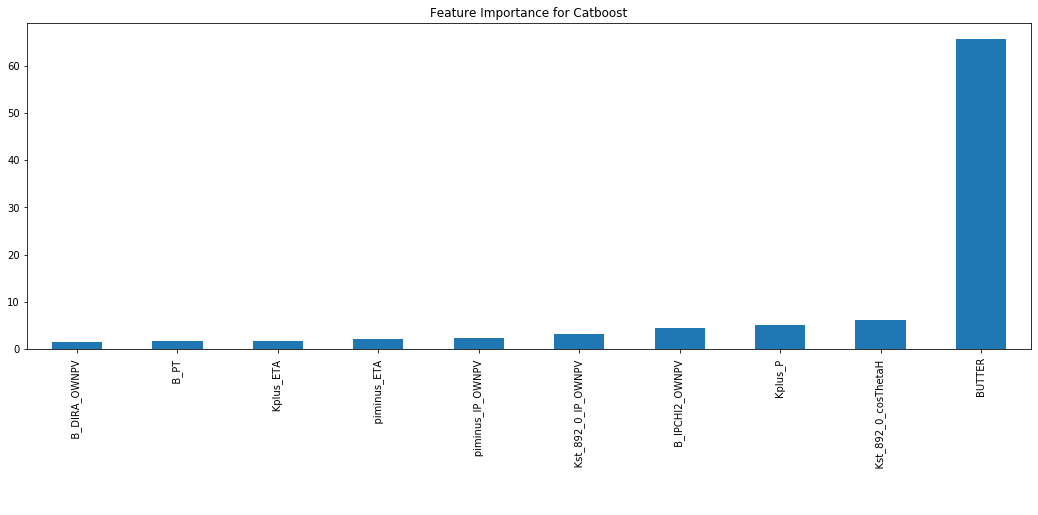

In [7]:
plot_feature_importance(df.drop(columns=['train']).columns,cb.get_feature_importance())

In [8]:
roc_auc_score(df.train,cb.predict(df.drop(columns=['train'])))

0.6902386803633289

## Butter out

In [9]:
cb = CatBoostClassifier(iterations=100,verbose=0)
cb.fit(df.drop(columns=['train','BUTTER']), df.train)

15 features, reduction of 0.00%


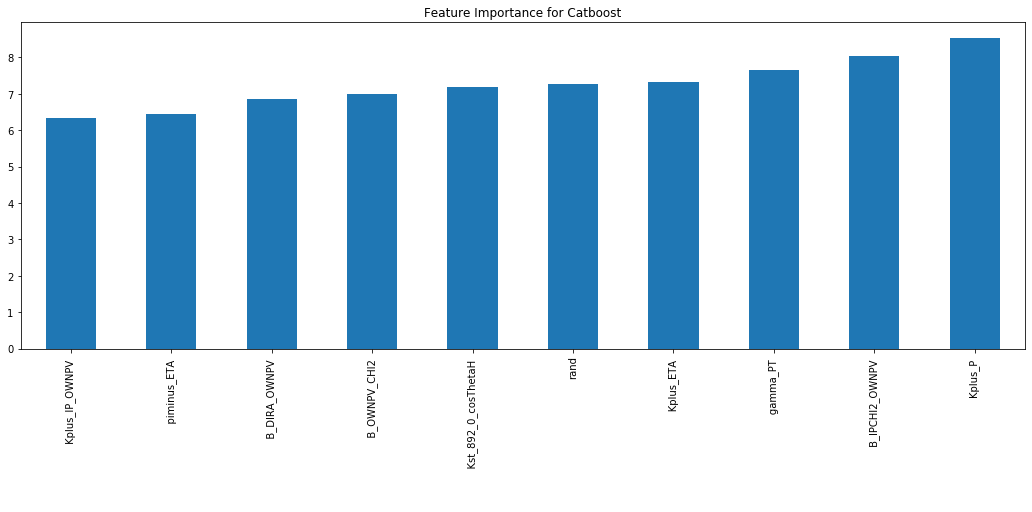

In [10]:
plot_feature_importance(df.drop(columns=['train','BUTTER']).columns,cb.get_feature_importance())

In [11]:
roc_auc_score(df.train,cb.predict(df.drop(columns=['train','BUTTER'])))

0.5056191708047584

## Submission

In [19]:
train = pd.read_csv('train.csv',index_col='Id')
test = pd.read_csv('test.csv',index_col='Id')
train = train.drop(columns='BUTTER')
test = test.drop(columns='BUTTER')

In [27]:
cb = CatBoostClassifier(verbose=0,eval_metric='AUC')
cb.fit(train.drop(columns='signal'),train.signal)

In [28]:
roc_auc_score(cb.predict(train.drop(columns='signal')),train.signal)

0.8041445161598045

In [29]:
test['Predicted'] = cb.predict(test)

In [30]:
test[['Predicted']].to_csv('initial_subm.csv')